In [1]:
from __future__ import print_function
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# basic Neural Network

# 재현을 위한 설정
np.random.seed(1671)

# 네트워크와 학습 설정
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # 출력 범주, 숫자의 종류[0:9]
OPTIMIZER = RMSprop() # RMSprop() optimizer
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # 학습 데이터 중 얼마나 검증 데이터로 할당할 지 지정
DROPOUT = 0.3
# 데이터: 무작위로 섞고, 학습 데이터와 테스트 데이터로 나눔
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train은 6만개의 행으로 구성, 28*28개의 값을 가지므로 60000*784 형태로 변환
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# 범주 벡터를 이진 범주 행렬로 변환
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [3]:
# 10개 출력
# 최종 단계는 softmax

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED, )))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

W0813 17:15:23.938600  9520 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 17:15:23.942600  9520 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 17:15:23.945600  9520 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 17:15:23.979600  9520 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0813 17:15:23.988600  9520 deprecation.py:506] Fr

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

In [4]:
model.compile(loss = 'categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

W0813 17:15:24.088600  9520 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 17:15:24.114600  9520 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [5]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

W0813 17:15:24.252600  9520 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 67us/step - loss: 0.4773 - acc: 0.8573 - val_loss: 0.1834 - val_acc: 0.9454
Epoch 2/20
48000/48000 [==============================] - 2s 52us/step - loss: 0.2259 - acc: 0.9331 - val_loss: 0.1366 - val_acc: 0.9592
Epoch 3/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.1739 - acc: 0.9484 - val_loss: 0.1180 - val_acc: 0.9661
Epoch 4/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.1506 - acc: 0.9554 - val_loss: 0.1141 - val_acc: 0.9677
Epoch 5/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.1344 - acc: 0.9599 - val_loss: 0.1014 - val_acc: 0.9716
Epoch 6/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.1233 - acc: 0.9626 - val_loss: 0.0951 - val_acc: 0.9718
Epoch 7/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.1124 - acc: 0.9666 - val_loss: 0.0977 - val_acc

In [6]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

10000/10000 [==============================] - 0s 39us/step
Test score:  0.09735717110430524
Test accuracy:  0.9772


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<function matplotlib.pyplot.show(*args, **kw)>

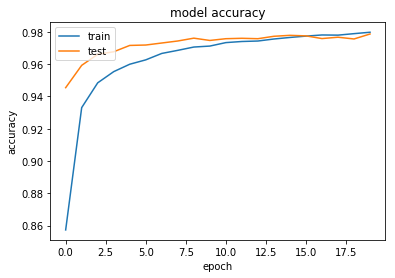

In [7]:
# 히스토리의 모든 데이터 목록
print(history.history.keys())
# 정확도 히스토리를 요약
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

In [9]:
OPTIMIZER = Adam()

In [10]:
# 10개 출력
# 최종 단계는 softmax

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED, )))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
__________

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [12]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 55us/step - loss: 0.5223 - acc: 0.8421 - val_loss: 0.1948 - val_acc: 0.9418
Epoch 2/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.2325 - acc: 0.9307 - val_loss: 0.1334 - val_acc: 0.9610
Epoch 3/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.1768 - acc: 0.9471 - val_loss: 0.1230 - val_acc: 0.9636
Epoch 4/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.1488 - acc: 0.9547 - val_loss: 0.1015 - val_acc: 0.9701
Epoch 5/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.1286 - acc: 0.9602 - val_loss: 0.0949 - val_acc: 0.9717
Epoch 6/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.1142 - acc: 0.9657 - val_loss: 0.0937 - val_acc: 0.9721
Epoch 7/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.1025 - acc: 0.9684 - val_loss: 0.0856 - val_acc

In [13]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

10000/10000 [==============================] - 0s 40us/step
Test score:  0.08187744157911366
Test accuracy:  0.9777


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<function matplotlib.pyplot.show(*args, **kw)>

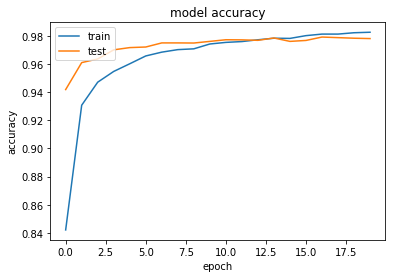

In [14]:
# 히스토리의 모든 데이터 목록
print(history.history.keys())
# 정확도 히스토리를 요약
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

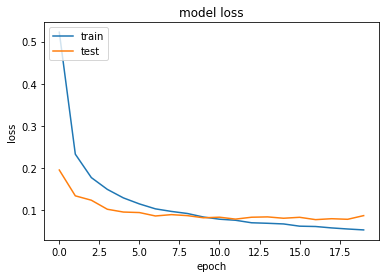

In [15]:
# 손실 히스토리를 요약
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

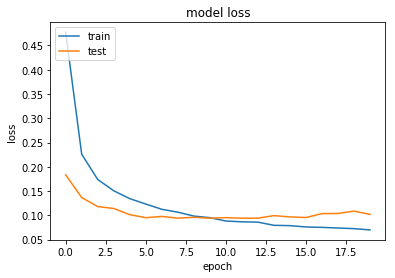

In [8]:
# 손실 히스토리를 요약
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show